In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import FID_util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/display/"

## Compounding

We aim to investigate the effects of compounding transformations by applying sequentially the transformations with the most favourable FID. The transformations found are saturation, gamma and sharpness adjustments. However, levels differ across images generated by different methods (DDIM vs LDM) and data sets (CIFAR 10 vs CelebA-HQ)

In [2]:
CIFAR_train_loader = DataLoader(datasets.CIFAR10('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True)

CIFAR_train = FID_util.load_data_single(CIFAR_train_loader, 10000, (32, 32))
CIFAR_generated = FID_util.load_from_dir("./diffusion_images/cifar_generated/*.png")
print(f"Base FID CIFAR-10: {FID_util.compute_FID(CIFAR_train, CIFAR_generated).item()}")

Files already downloaded and verified
Base FID CIFAR-10: 17.56197166442871


In [3]:
CelebA_train = FID_util.load_from_dir("./data/celeba_hq_256/*.jpg", seed)
CelebA_generated = FID_util.load_from_dir("./diffusion_images/celebA_generated/*.png")
print(f"Base FID CelebA-HQ DDIM: {FID_util.compute_FID(CelebA_train, CelebA_generated, batch_num=125).item()}")
CelebA_ldm_generated = FID_util.load_from_dir("./diffusion_images/celebA_ldm_generated/*.png")
print(f"Base FID CelebA-HQ LDM: {FID_util.compute_FID(CelebA_train, CelebA_ldm_generated, batch_num=125).item()}")

Base FID CelebA-HQ DDIM: 21.09842300415039
Base FID CelebA-HQ LDM: 25.89986801147461


In [4]:
def all_transform(data_generated, factors):
    data_list = [transforms.functional.adjust_gamma(data_generated, factors[0]),
                 transforms.functional.adjust_saturation(data_generated, factors[1])]
    return data_list

def print_transform_FID(transform_a, transform_b, dataset_train, dataset_transformed, batch_num = 125):
    FID_util.display_image(dataset_transformed[560])
    print(f"{transform_a} {transform_b} yields FID score: {FID_util.compute_FID(dataset_train, dataset_transformed, batch_num=batch_num)}")

## CIFAR - Compounding

CIFAR 10: Gamma - 0.8, Saturation - 0.8, Sharpness - 2.4

In [5]:
one_transform = all_transform(CIFAR_generated, (0.8, 0.8))

Gamma, Saturation yields FID score: 16.170095443725586


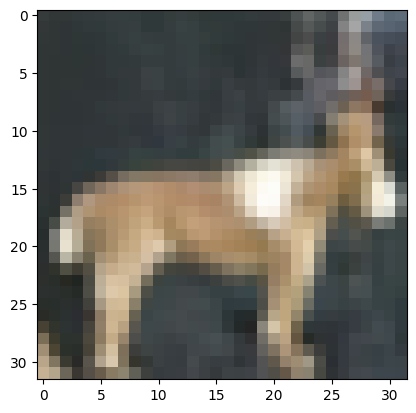

In [6]:
CIFAR_gamma_saturation = transforms.functional.adjust_saturation(one_transform[0], 0.8)
print_transform_FID("Gamma,", "Saturation", CIFAR_train, CIFAR_gamma_saturation, batch_num=1000)
plt.savefig(plot_path + "CIFAR_gamma_saturation_display.png")

Gamma, Sharpness yields FID score: 13.91720962524414


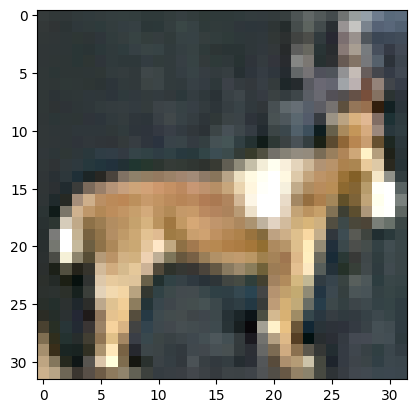

In [7]:
CIFAR_gamma_sharpness = transforms.functional.adjust_sharpness(one_transform[0], 2.4)
print_transform_FID("Gamma,", "Sharpness", CIFAR_train, CIFAR_gamma_sharpness, batch_num=1000)
plt.savefig(plot_path + "CIFAR_gamma_sharpness_display.png")

Saturation, Sharpness yields FID score: 14.727696418762207


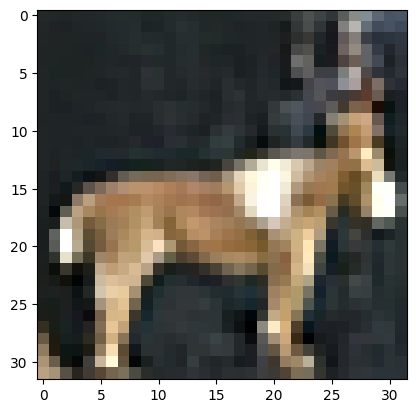

In [8]:
CIFAR_saturation_sharpness = transforms.functional.adjust_sharpness(one_transform[1], 2.4)
print_transform_FID("Saturation,", "Sharpness", CIFAR_train, CIFAR_saturation_sharpness, batch_num=1000)
plt.savefig(plot_path + "CIFAR_saturation_sharpness_display.png")

All transformations yields FID score: 15.544085502624512


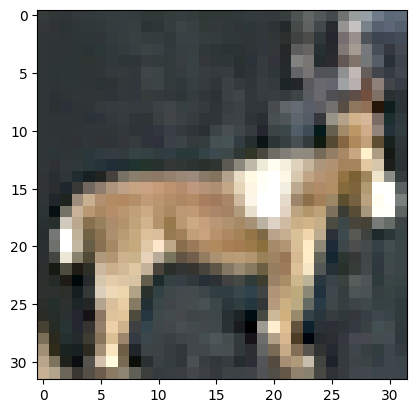

In [9]:
CIFAR_all = transforms.functional.adjust_gamma(CIFAR_saturation_sharpness, 0.8)
print_transform_FID("All", "transformations", CIFAR_train, CIFAR_all, batch_num=1000)
plt.savefig(plot_path + "CIFAR_all_display.png")

## CelebA DDIM - Compounding

CelebA-HQ (DDIM generated): Gamma - 1.4, Saturation - 0.4, Sharpness - 1.2

In [10]:
one_transform = all_transform(CelebA_generated, (1.4, 0.4))

Gamma, Saturation yields FID score: 18.928617477416992


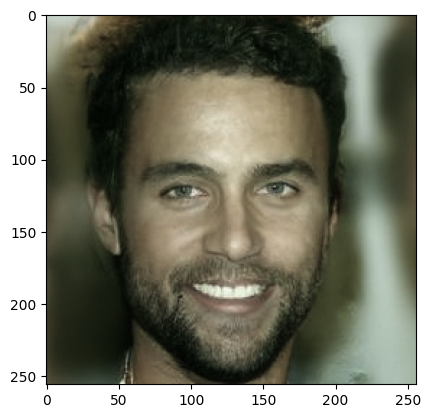

In [11]:
CelebA_gamma_saturation = transforms.functional.adjust_saturation(one_transform[0], 0.4)
print_transform_FID("Gamma,", "Saturation", CelebA_train, CelebA_gamma_saturation)
plt.savefig(plot_path + "CelebA_gamma_saturation_display.png")

Gamma, Sharpness yields FID score: 19.228357315063477


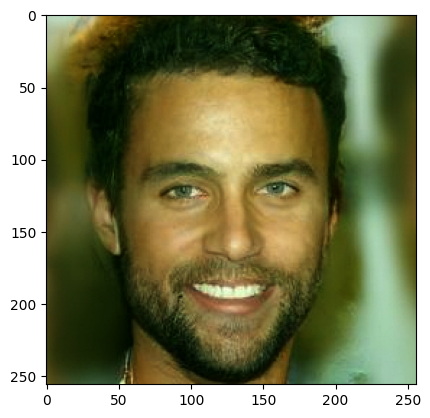

In [12]:
CelebA_gamma_sharpness = transforms.functional.adjust_sharpness(one_transform[0], 1.2)
print_transform_FID("Gamma,", "Sharpness", CelebA_train, CelebA_gamma_sharpness)
plt.savefig(plot_path + "CelebA_gamma_sharpness_display.png")

Saturation, Sharpness yields FID score: 19.613210678100586


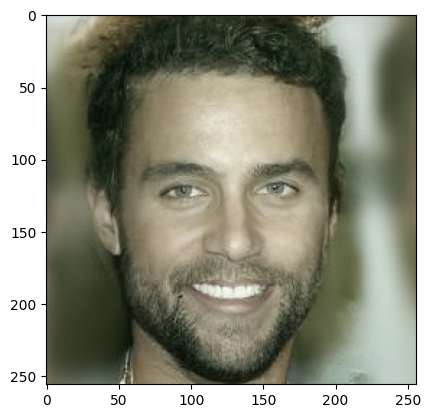

In [13]:
CelebA_saturation_sharpness = transforms.functional.adjust_sharpness(one_transform[1], 1.2)
print_transform_FID("Saturation,", "Sharpness", CelebA_train, CelebA_saturation_sharpness)
plt.savefig(plot_path + "CelebA_saturation_sharpness_display.png")

All transformations yields FID score: 18.16127586364746


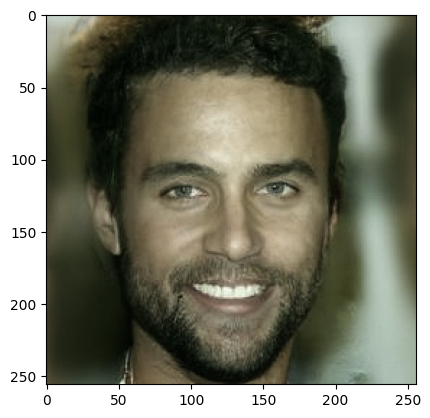

In [14]:
CelebA_all = transforms.functional.adjust_gamma(CelebA_saturation_sharpness, 1.4)
print_transform_FID("All", "transformations", CelebA_train, CelebA_all)
plt.savefig(plot_path + "CelebA_all_display.png")

## CelebA LDM - Compounding

CelebA-HQ (LDM generated): Gamma - 1.2, Saturation - 0.6, Sharpness - 0.4

In [15]:
one_transform = all_transform(CelebA_ldm_generated, (1.2, 0.6))

Gamma, Saturation yields FID score: 24.62995719909668


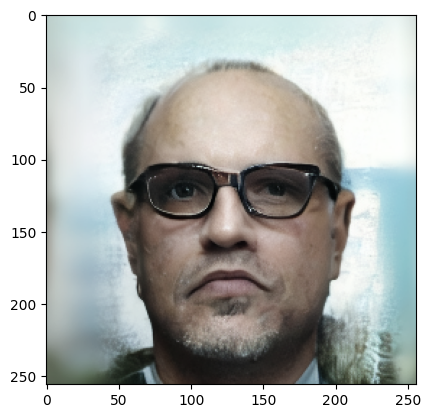

In [16]:
CelebA_ldm_gamma_saturation = transforms.functional.adjust_saturation(one_transform[0], 0.6)
print_transform_FID("Gamma,", "Saturation", CelebA_train, CelebA_ldm_gamma_saturation)
plt.savefig(plot_path + "CelebA_ldm_gamma_saturation_display.png")

Gamma, Sharpness yields FID score: 20.65027618408203


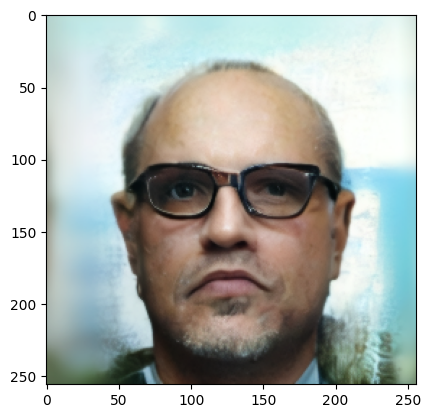

In [17]:
CelebA_ldm_gamma_sharpness = transforms.functional.adjust_sharpness(one_transform[0], 0.4)
print_transform_FID("Gamma,", "Sharpness", CelebA_train, CelebA_ldm_gamma_sharpness)
plt.savefig(plot_path + "CelebA_ldm_gamma_sharpness_display.png")

Saturation, Sharpness yields FID score: 20.720020294189453


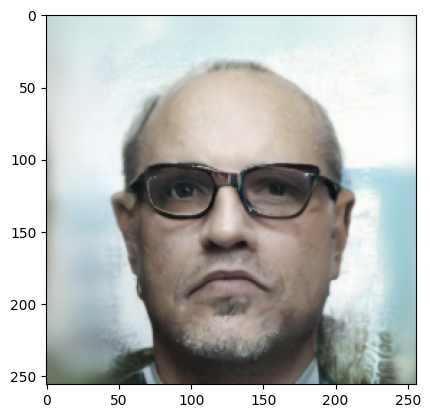

In [18]:
CelebA_ldm_saturation_sharpness = transforms.functional.adjust_sharpness(one_transform[1], 0.4)
print_transform_FID("Saturation,", "Sharpness", CelebA_train, CelebA_ldm_saturation_sharpness)
plt.savefig(plot_path + "CelebA_ldm_saturation_sharpness_display.png")

All transformations yields FID score: 20.65370750427246


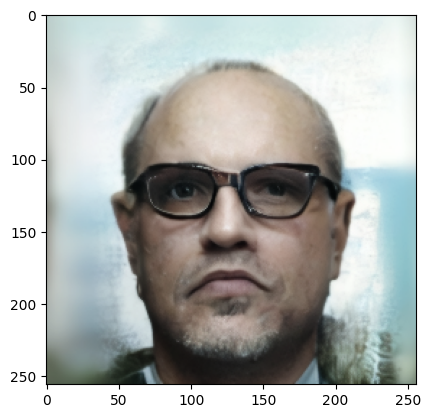

In [19]:
CelebA_ldm_all = transforms.functional.adjust_gamma(CelebA_ldm_saturation_sharpness, 1.2)
print_transform_FID("All", "transformations", CelebA_train, CelebA_ldm_all)
plt.savefig(plot_path + "CelebA_ldm_all_display.png")